# Chapter 3 - Time Series Data Preparation

## Python for time series data

## Common data preparation operations for time series

### Timestamps vs. Time Spans

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
pd.Timestamp(dt.datetime(2014, 5, 1))

Timestamp('2014-05-01 00:00:00')

In [3]:
pd.Timestamp("2014-06-01")

Timestamp('2014-06-01 00:00:00')

In [4]:
pd.Timestamp(2014, 6, 1)

Timestamp('2014-06-01 00:00:00')

In [5]:
pd.Period("2014-06")

Period('2014-06', 'M')

In [6]:
pd.Period("2014-06", freq="D")

Period('2014-06-01', 'D')

In [7]:
dates = [
    pd.Timestamp("2014-06-01"),
    pd.Timestamp("2014-06-02"),
    pd.Timestamp("2014-06-03"),
]

ts_data = pd.Series(np.random.randn(3), dates)

type(ts_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
ts_data.index

DatetimeIndex(['2014-06-01', '2014-06-02', '2014-06-03'], dtype='datetime64[ns]', freq=None)

In [9]:
ts_data

2014-06-01   -1.581498
2014-06-02    1.198892
2014-06-03   -0.615965
dtype: float64

In [10]:
periods = [pd.Period("2014-01"), pd.Period("2014-02"), pd.Period("2014-03")]
ts_data = pd.Series(np.random.randn(3), periods)
type(ts_data.index)

pandas.core.indexes.period.PeriodIndex

In [11]:
ts_data.index

PeriodIndex(['2014-01', '2014-02', '2014-03'], dtype='period[M]')

In [12]:
ts_data

2014-01   -0.900394
2014-02    0.253018
2014-03   -0.452299
Freq: M, dtype: float64

### Converting to timestamps

In [13]:
pd.to_datetime(pd.Series(["Jul 31, 2012", "2012-01-10", None]))

0   2012-07-31
1   2012-01-10
2          NaT
dtype: datetime64[ns]

In [14]:
pd.to_datetime(["2012/11/23", "2012.12.31"])

DatetimeIndex(['2012-11-23', '2012-12-31'], dtype='datetime64[ns]', freq=None)

In [15]:
pd.to_datetime(["04-01-2014 10:00"], dayfirst=True)

DatetimeIndex(['2014-01-04 10:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime(["14-01-2014", "01-14-2012"], dayfirst=True)

DatetimeIndex(['2014-01-14', '2012-01-14'], dtype='datetime64[ns]', freq=None)

### Providing a Format Argument

In [17]:
pd.to_datetime("2018/11/12", format="%Y/%m/%d")

Timestamp('2018-11-12 00:00:00')

In [18]:
pd.to_datetime("11-11-2018 00:00", format="%d-%m-%Y %H:%M")

Timestamp('2018-11-11 00:00:00')

### Indexing

In [19]:
import os
import shutil
from common.utils import download_file, extract_data, load_data

pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)

In [20]:
data_dir = "./data"

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

if not os.path.exists(os.path.join(data_dir, "energy.csv")):
    download_file("https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip")
    shutil.move("GEFCom2014.zip", os.path.join(data_dir, "GEFCom2014.zip"))
    extract_data(data_dir)

In [21]:
ts_data_load = load_data(data_dir)[["load"]]
ts_data_load.head()

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"


In [22]:
ts_data_load.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [23]:
ts_data_load[:5].index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [24]:
ts_data_load[::2].index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 02:00:00',
               '2012-01-01 04:00:00', '2012-01-01 06:00:00',
               '2012-01-01 08:00:00', '2012-01-01 10:00:00',
               '2012-01-01 12:00:00', '2012-01-01 14:00:00',
               '2012-01-01 16:00:00', '2012-01-01 18:00:00',
               ...
               '2014-12-31 04:00:00', '2014-12-31 06:00:00',
               '2014-12-31 08:00:00', '2014-12-31 10:00:00',
               '2014-12-31 12:00:00', '2014-12-31 14:00:00',
               '2014-12-31 16:00:00', '2014-12-31 18:00:00',
               '2014-12-31 20:00:00', '2014-12-31 22:00:00'],
              dtype='datetime64[ns]', length=13152, freq='2H')

In [25]:
ts_data_load["2012-6-01"]

C:\Users\furyx\miniconda3\envs\timeseriesbook\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,load
2012-06-01 00:00:00,"2,474.00"
2012-06-01 01:00:00,"2,349.00"
2012-06-01 02:00:00,"2,291.00"
2012-06-01 03:00:00,"2,281.00"
2012-06-01 04:00:00,"2,343.00"
2012-06-01 05:00:00,"2,518.00"
2012-06-01 06:00:00,"2,934.00"
2012-06-01 07:00:00,"3,235.00"
2012-06-01 08:00:00,"3,348.00"
2012-06-01 09:00:00,"3,405.00"


In [26]:
ts_data_load["2012-1":"2012-2-28"]

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"
...,...
2012-02-28 19:00:00,"3,858.00"
2012-02-28 20:00:00,"3,687.00"
2012-02-28 21:00:00,"3,420.00"
2012-02-28 22:00:00,"3,122.00"


In [27]:
ts_data_load["2012-1":"2012-1-2 00:00:00"]

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"
2012-01-01 05:00:00,"2,453.00"
2012-01-01 06:00:00,"2,560.00"
2012-01-01 07:00:00,"2,719.00"
2012-01-01 08:00:00,"2,916.00"
2012-01-01 09:00:00,"3,105.00"


In [28]:
ts_data_load.truncate(before="2013-11-01", after="2013-11-02")

,load
2013-11-01 00:00:00,"2,506.00"
2013-11-01 01:00:00,"2,419.00"
2013-11-01 02:00:00,"2,369.00"
2013-11-01 03:00:00,"2,349.00"
2013-11-01 04:00:00,"2,425.00"
2013-11-01 05:00:00,"2,671.00"
2013-11-01 06:00:00,"3,143.00"
2013-11-01 07:00:00,"3,438.00"
2013-11-01 08:00:00,"3,486.00"
2013-11-01 09:00:00,"3,541.00"


### Frequency conversion

In [29]:
ts_data = load_data(data_dir)
ts_data.head(10)

,load,temp
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00
2012-01-01 05:00:00,"2,453.00",31.33
2012-01-01 06:00:00,"2,560.00",30.00
2012-01-01 07:00:00,"2,719.00",29.00
2012-01-01 08:00:00,"2,916.00",29.00
2012-01-01 09:00:00,"3,105.00",33.33


In [30]:
daily_ts_data = ts_data.asfreq(pd.offsets.BDay())
daily_ts_data.head(5)

,load,temp
2012-01-02,"2,458.00",43.67
2012-01-03,"2,780.00",26.33
2012-01-04,"3,184.00",6.00
2012-01-05,"3,014.00",22.33
2012-01-06,"2,992.00",17.00


In [31]:
daily_ts_data.asfreq(pd.offsets.BDay(), method="pad")
daily_ts_data.head(5)

,load,temp
2012-01-02,"2,458.00",43.67
2012-01-03,"2,780.00",26.33
2012-01-04,"3,184.00",6.00
2012-01-05,"3,014.00",22.33
2012-01-06,"2,992.00",17.00


# Time series exploration and understanding

## How to get started with time series data analysis

In [32]:
import warnings
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

warnings.filterwarnings("ignore")

In [33]:
ts_data.isna().sum()

load    0
temp    0
dtype: int64

In [34]:
ts_data.dtypes

load    float64
temp    float64
dtype: object

In [35]:
ts_data.describe()

,load,temp
count,"26,304.00","26,304.00"
mean,"3,303.77",47.77
std,564.58,19.34
min,"1,979.00",-13.67
25%,"2,867.00",32.67
50%,"3,364.00",48.33
75%,"3,690.00",63.67
max,"5,224.00",95.00


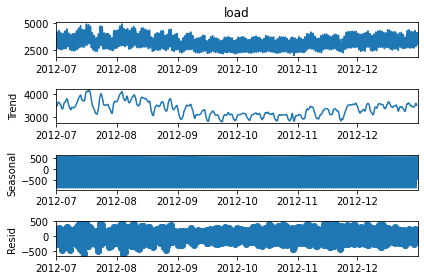

In [36]:
ts_data_load = ts_data["load"]
decomposition = sm.tsa.seasonal_decompose(
    ts_data_load["2012-07-01":"2012-12-31"], model="additive"
)

fig = decomposition.plot()
matplotlib.rcParams["figure.figsize"] = [10.0, 6.0]

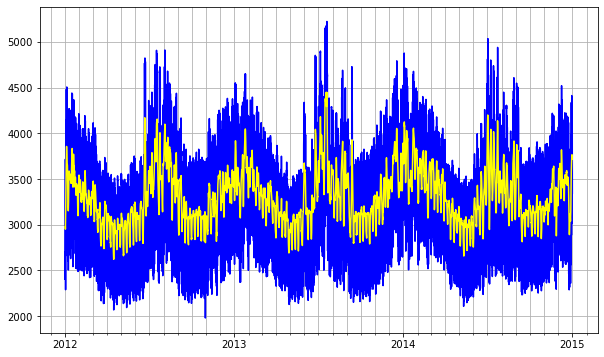

In [37]:
decomposition = sm.tsa.seasonal_decompose(ts_data_load, model="additive")

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)

year_format = mdates.DateFormatter("%Y")
month_format = mdates.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which="minor")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(ts_data_load.index, ts_data_load, c="blue")
plt.plot(decomposition.trend.index, decomposition.trend, c="yellow")

## Data Cleaning of Missing Values in the Time Series

In [38]:
ts_data_load.interpolate(limit=8, method="linear", limit_direction="both")

2012-01-01 00:00:00   2,698.00
2012-01-01 01:00:00   2,558.00
2012-01-01 02:00:00   2,444.00
2012-01-01 03:00:00   2,402.00
2012-01-01 04:00:00   2,403.00
                        ...   
2014-12-31 19:00:00   4,012.00
2014-12-31 20:00:00   3,856.00
2014-12-31 21:00:00   3,671.00
2014-12-31 22:00:00   3,499.00
2014-12-31 23:00:00   3,345.00
Freq: H, Name: load, Length: 26304, dtype: float64

In [39]:
from scipy import stats

In [40]:
temp_mode = np.asscalar(stats.mode(ts_data["temp"]).mode)
ts_data["temp"] = ts_data["temp"].fillna(temp_mode)
ts_data.isnull().sum()

load    0
temp    0
dtype: int64

### Time Series Data Normalization and Standardization

In [41]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

values = ts_data_load.values
values = values.reshape((len(values), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print("Min: %f, Max: %f" % (scaler.data_min_, scaler.data_max_))

Min: 1979.000000, Max: 5224.000000


In [42]:
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

from math import sqrt

[0.22]
[0.18]
[0.14]
[0.13]
[0.13]
[2698.]
[2558.]
[2444.]
[2402.]
[2403.]


In [43]:
from sklearn.preprocessing import StandardScaler

values = ts_data_load.values
values = values.reshape((len(values), 1))

scaler = StandardScaler()
scaler = scaler.fit(values)
print("Mean: %f, StandardDeviation: %f" % (scaler.mean_, sqrt(scaler.var_)))

Mean: 3303.769199, StandardDeviation: 564.568521


In [44]:
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

[-1.07]
[-1.32]
[-1.52]
[-1.6]
[-1.6]
[2698.]
[2558.]
[2444.]
[2402.]
[2403.]


## Time series feature engineering

### Date Time Features

In [45]:
ts_data["hour"] = [ts_data.index[i].hour for i in range(len(ts_data))]
ts_data["month"] = [ts_data.index[i].month for i in range(len(ts_data))]
ts_data["dayofweek"] = [ts_data.index[i].day for i in range(len(ts_data))]
print(ts_data.head(5))

                        load  temp  hour  month  dayofweek
2012-01-01 00:00:00 2,698.00 32.00     0      1          1
2012-01-01 01:00:00 2,558.00 32.67     1      1          1
2012-01-01 02:00:00 2,444.00 30.00     2      1          1
2012-01-01 03:00:00 2,402.00 31.00     3      1          1
2012-01-01 04:00:00 2,403.00 32.00     4      1          1


### Lagged Features

####  Shift function with DateOffset class and offset alias

In [46]:
ts_data = load_data(data_dir)
ts_data.head(10)

,load,temp
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00
2012-01-01 05:00:00,"2,453.00",31.33
2012-01-01 06:00:00,"2,560.00",30.00
2012-01-01 07:00:00,"2,719.00",29.00
2012-01-01 08:00:00,"2,916.00",29.00
2012-01-01 09:00:00,"3,105.00",33.33


In [47]:
ts_data_shift = ts_data.shift(4, freq=pd.offsets.BDay())
ts_data_shift.head(5)

,load,temp
2012-01-05 00:00:00,"2,698.00",32.00
2012-01-05 01:00:00,"2,558.00",32.67
2012-01-05 02:00:00,"2,444.00",30.00
2012-01-05 03:00:00,"2,402.00",31.00
2012-01-05 04:00:00,"2,403.00",32.00


In [48]:
ts_data_shift_2 = ts_data.tshift(6, freq="D")
ts_data_shift_2.head(5)

,load,temp
2012-01-07 00:00:00,"2,698.00",32.00
2012-01-07 01:00:00,"2,558.00",32.67
2012-01-07 02:00:00,"2,444.00",30.00
2012-01-07 03:00:00,"2,402.00",31.00
2012-01-07 04:00:00,"2,403.00",32.00


#### Shift() function

In [49]:
def generated_lagged_features(ts_data, var, max_lag):
    for t in range(1, max_lag + 1):
        ts_data[var + "_lag" + str(t)] = ts_data[var].shift(t, freq="1H")

In [50]:
generated_lagged_features(ts_data, "load", 8)
generated_lagged_features(ts_data, "temp", 8)
print(ts_data.head(5))

                        load  temp  load_lag1  load_lag2  load_lag3  \
2012-01-01 00:00:00 2,698.00 32.00        NaN        NaN        NaN   
2012-01-01 01:00:00 2,558.00 32.67   2,698.00        NaN        NaN   
2012-01-01 02:00:00 2,444.00 30.00   2,558.00   2,698.00        NaN   
2012-01-01 03:00:00 2,402.00 31.00   2,444.00   2,558.00   2,698.00   
2012-01-01 04:00:00 2,403.00 32.00   2,402.00   2,444.00   2,558.00   

                     load_lag4  load_lag5  load_lag6  load_lag7  load_lag8  \
2012-01-01 00:00:00        NaN        NaN        NaN        NaN        NaN   
2012-01-01 01:00:00        NaN        NaN        NaN        NaN        NaN   
2012-01-01 02:00:00        NaN        NaN        NaN        NaN        NaN   
2012-01-01 03:00:00        NaN        NaN        NaN        NaN        NaN   
2012-01-01 04:00:00   2,698.00        NaN        NaN        NaN        NaN   

                     temp_lag1  temp_lag2  temp_lag3  temp_lag4  temp_lag5  \
2012-01-01 00:00:00       

### Rolling Window Statistics

In [51]:
from pandas import concat

load_val = ts_data[["load"]]
shifted = load_val.shift(1)

window = shifted.rolling(window=6)
means = window.mean()
new_dataframe = concat([means, load_val], axis=1)
new_dataframe.columns = ["load_rol_mean", "load"]

print(new_dataframe.head(10))

                     load_rol_mean     load
2012-01-01 00:00:00            NaN 2,698.00
2012-01-01 01:00:00            NaN 2,558.00
2012-01-01 02:00:00            NaN 2,444.00
2012-01-01 03:00:00            NaN 2,402.00
2012-01-01 04:00:00            NaN 2,403.00
2012-01-01 05:00:00            NaN 2,453.00
2012-01-01 06:00:00       2,493.00 2,560.00
2012-01-01 07:00:00       2,470.00 2,719.00
2012-01-01 08:00:00       2,496.83 2,916.00
2012-01-01 09:00:00       2,575.50 3,105.00


In [52]:
from pandas import concat

load_val = ts_data[["load"]]
width = 4
shifted = load_val.shift(width - 1)
window = shifted.rolling(window=width)

new_dataframe = pd.concat([window.min(), window.mean(), window.max(), load_val], axis=1)
new_dataframe.columns = ["min", "mean", "max", "load"]

print(new_dataframe.head(10))

                         min     mean      max     load
2012-01-01 00:00:00      NaN      NaN      NaN 2,698.00
2012-01-01 01:00:00      NaN      NaN      NaN 2,558.00
2012-01-01 02:00:00      NaN      NaN      NaN 2,444.00
2012-01-01 03:00:00      NaN      NaN      NaN 2,402.00
2012-01-01 04:00:00      NaN      NaN      NaN 2,403.00
2012-01-01 05:00:00      NaN      NaN      NaN 2,453.00
2012-01-01 06:00:00 2,402.00 2,525.50 2,698.00 2,560.00
2012-01-01 07:00:00 2,402.00 2,451.75 2,558.00 2,719.00
2012-01-01 08:00:00 2,402.00 2,425.50 2,453.00 2,916.00
2012-01-01 09:00:00 2,402.00 2,454.50 2,560.00 3,105.00


### Expanding Window Statistics

In [53]:
from pandas import concat

load_val = ts_data[["load"]]
window = load_val.expanding()
new_dataframe = concat(
    [window.min(), window.mean(), window.max(), load_val.shift(-1)], axis=1
)
new_dataframe.columns = ["min", "mean", "max", "load+1"]
print(new_dataframe.head(10))

                         min     mean      max   load+1
2012-01-01 00:00:00 2,698.00 2,698.00 2,698.00 2,558.00
2012-01-01 01:00:00 2,558.00 2,628.00 2,698.00 2,444.00
2012-01-01 02:00:00 2,444.00 2,566.67 2,698.00 2,402.00
2012-01-01 03:00:00 2,402.00 2,525.50 2,698.00 2,403.00
2012-01-01 04:00:00 2,402.00 2,501.00 2,698.00 2,453.00
2012-01-01 05:00:00 2,402.00 2,493.00 2,698.00 2,560.00
2012-01-01 06:00:00 2,402.00 2,502.57 2,698.00 2,719.00
2012-01-01 07:00:00 2,402.00 2,529.62 2,719.00 2,916.00
2012-01-01 08:00:00 2,402.00 2,572.56 2,916.00 3,105.00
2012-01-01 09:00:00 2,402.00 2,625.80 3,105.00 3,174.00
